In [46]:
import openai

In [47]:
import langchain

In [48]:
from langchain import llms

In [49]:
from langchain.llms import OpenAI

**langchain github: https://github.com/langchain-ai/langchain**


In [ ]:
OPENAI_KEY="your-openai-api-key"

In [51]:
client=OpenAI(openai_api_key=OPENAI_KEY,temperature=1.2)

In [52]:
prompt="what is the capital of india?"

In [53]:
client.predict(prompt)

'\n\nThe capital of India is New Delhi.'

In [54]:
client.predict(prompt).strip()

'The capital of India is New Delhi.'

In [55]:
prompt2="who is a owner of ineuron.ai? which is one of the edtech in india."

In [56]:
client.predict(prompt2).strip()

'The owner of Ineuron.AI is Abhishake Sangwan, who is also the founder and Chief Technology Officer of the company.'

In [57]:
prompt3="who is a sunny leone?"

In [58]:
client.predict(prompt3).strip()

'Sunny Leone is a Canadian-born Bollywood actress and model known for her appearances in Indian films. After pursuing a career in the adult film industry from 2001 to 2013, Leone has now become a well-known Bollywood icon and has acted in several successful films. Some of her most famous films are Jism 2 (2012), Mountain 2 (2015), Ek Paheli Leela (2015) and Kuch Kuch Locha Hai (2015).'

**here in the previos example you can see that we are passing a entire input to our model but there is senerio where you are not passing the entire input to your model**

**instead you you just requierd a word so for that this langchian gives you prompt templte where you can degine your prompt according to your requirement.**

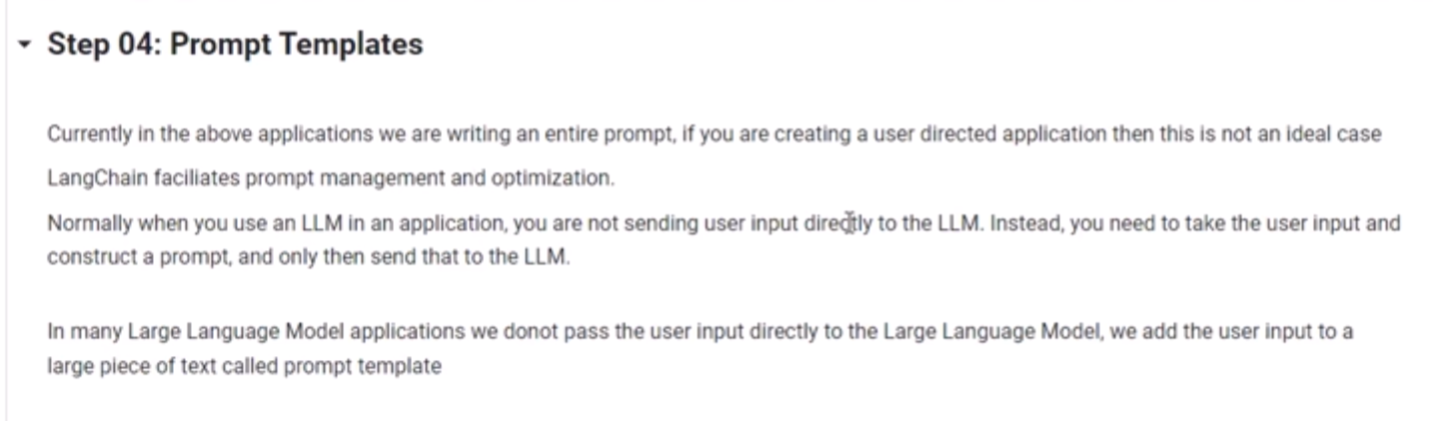

so here we just take a input from a user and construct a prompt

# Prompt Templates:

In [60]:
from langchain.prompts import PromptTemplate

In [61]:
prompt_template_name=PromptTemplate(

    input_variables=["City"],

    template="can you tell me the capital of {City}?"
)

In [62]:
prompt=prompt_template_name.format(City="china")

In [63]:
print(prompt)

can you tell me the capital of china?


In [64]:
client.predict(prompt).strip()

'The capital of China is Beijing.'

In [65]:
prompt=prompt_template_name.format(City="Russia")

In [66]:
prompt

'can you tell me the capital of Russia?'

In [67]:
client.predict(prompt).strip()

'The capital of Russia is Moscow.'

In [68]:
prompt=PromptTemplate.from_template("what is a good name for a compnay that makes a {product}")

In [69]:
prompt=prompt.format(product="toys")

In [70]:
prompt

'what is a good name for a compnay that makes adult toys'

In [71]:
client.predict(prompt).strip()

'Luscious Lingerie and Novelties.'

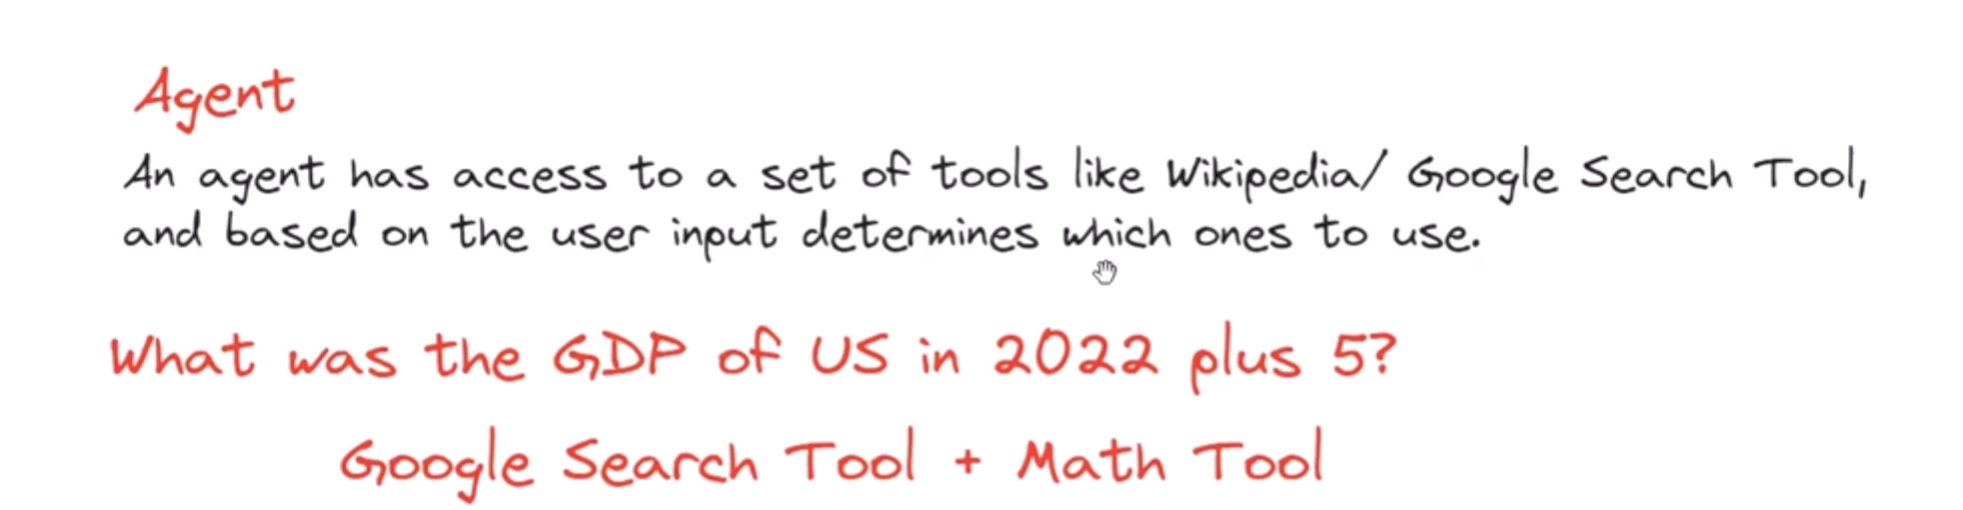

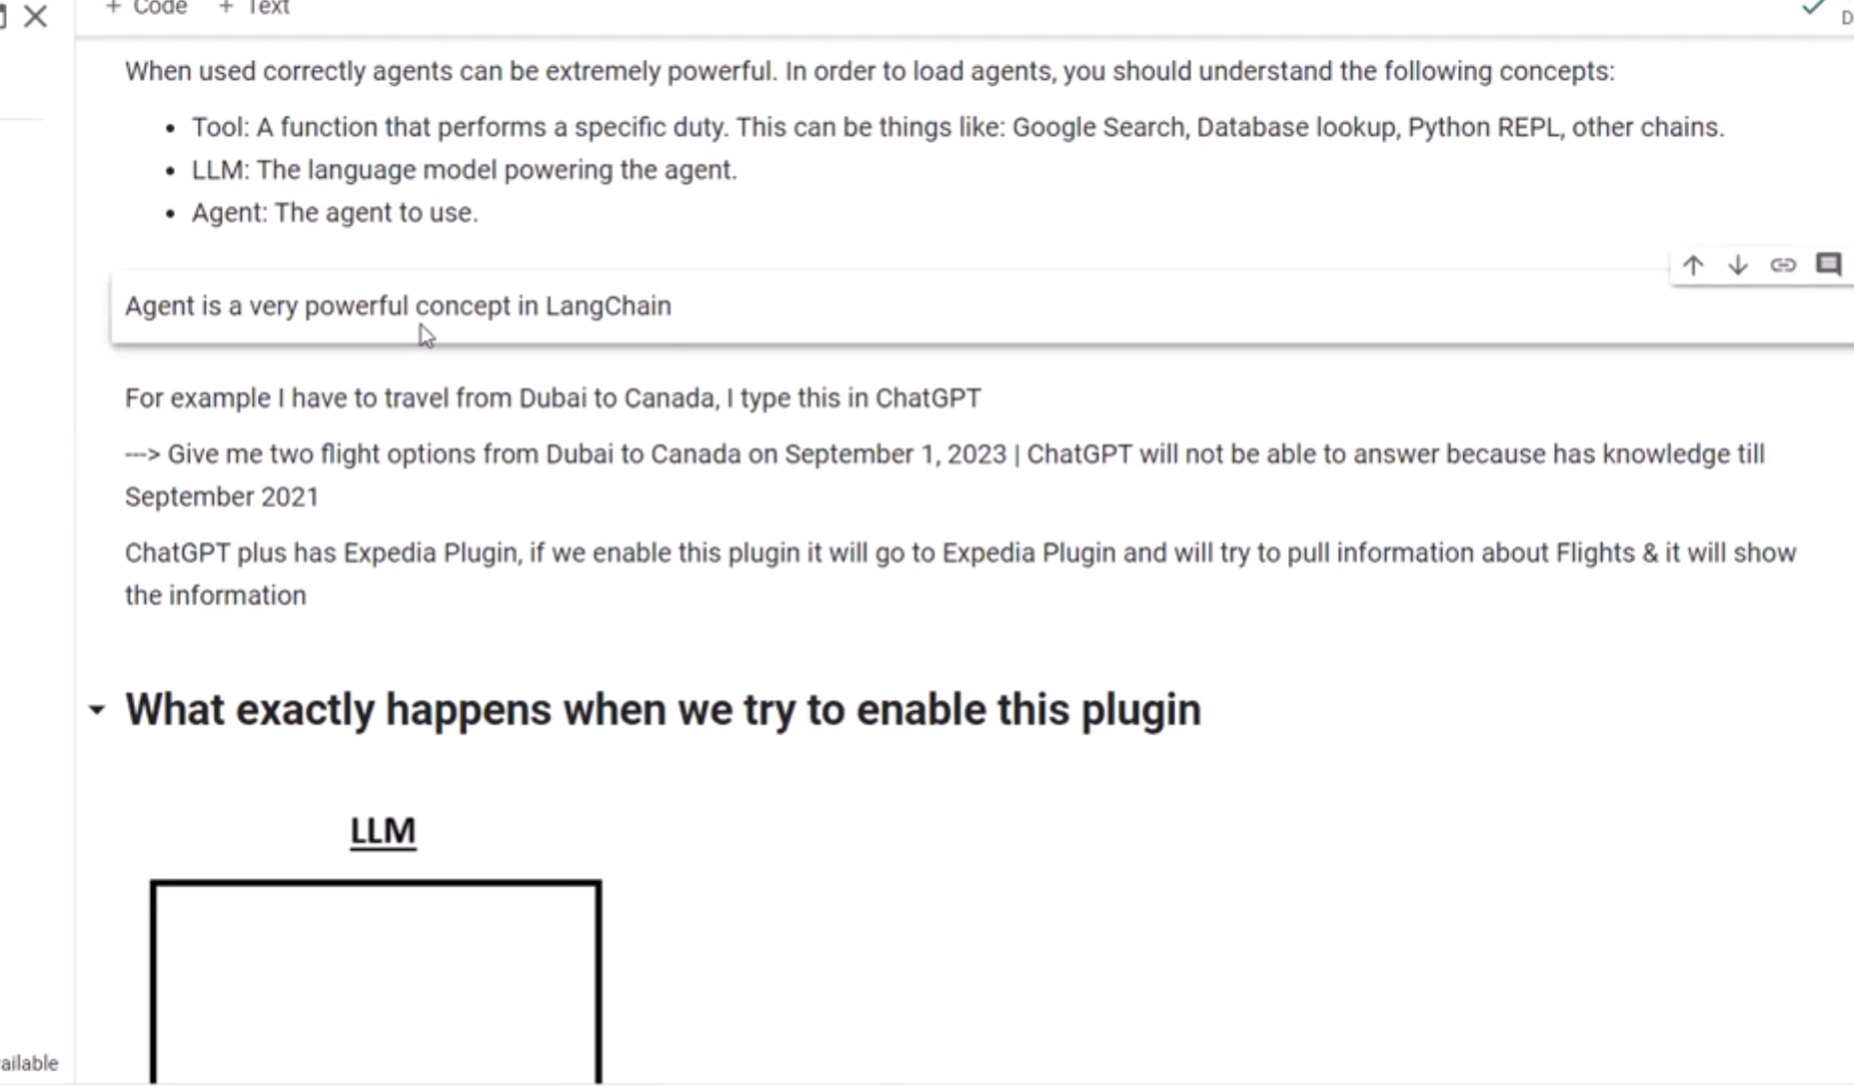

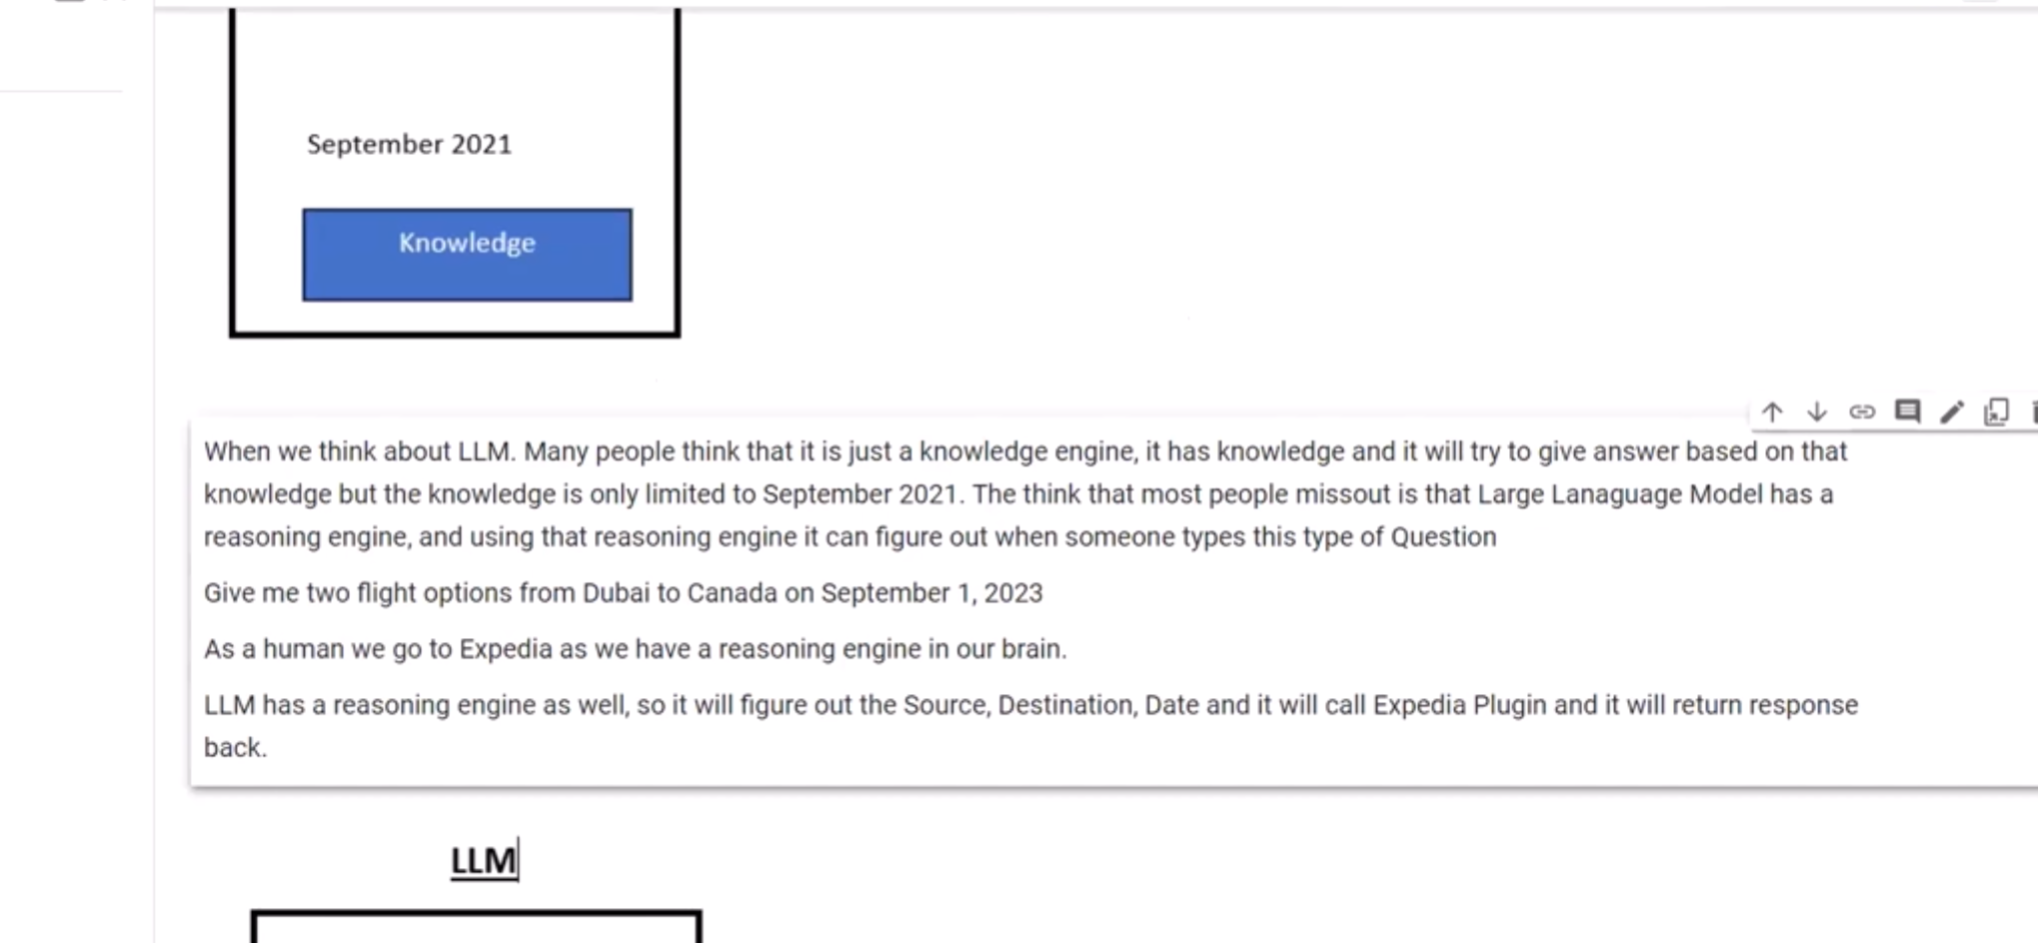

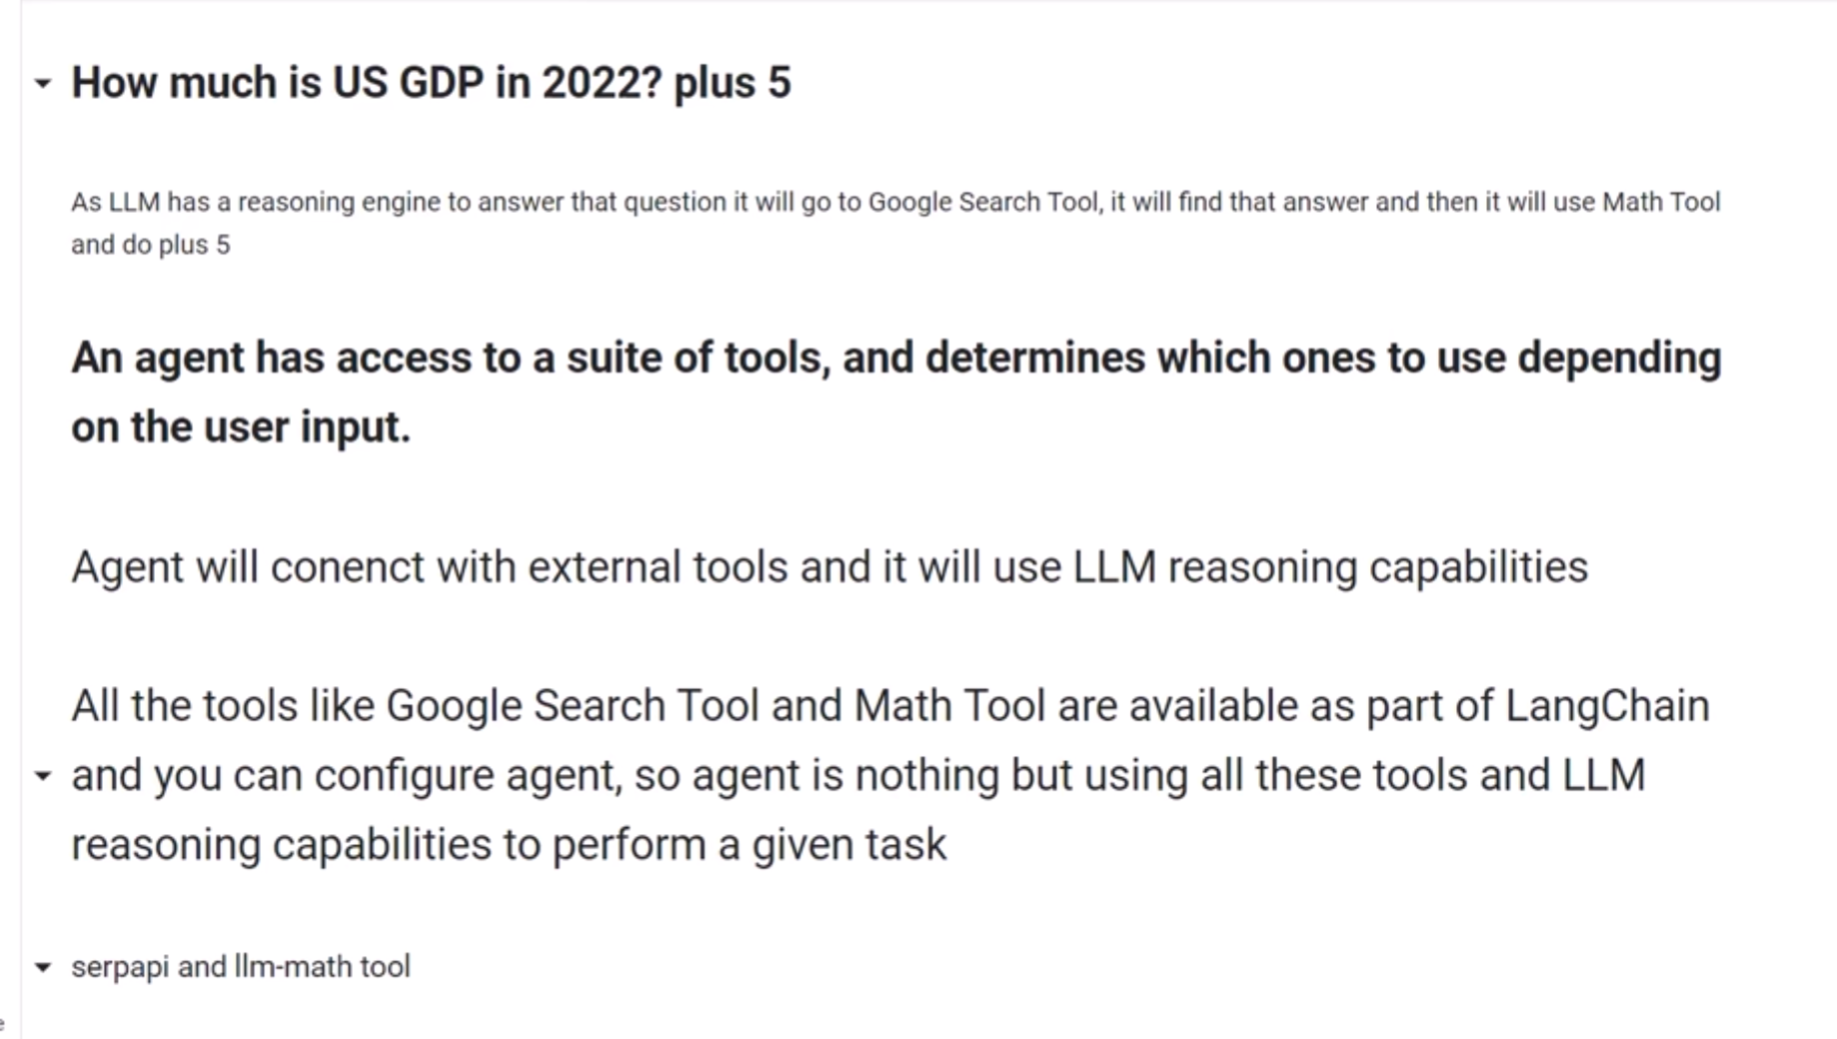

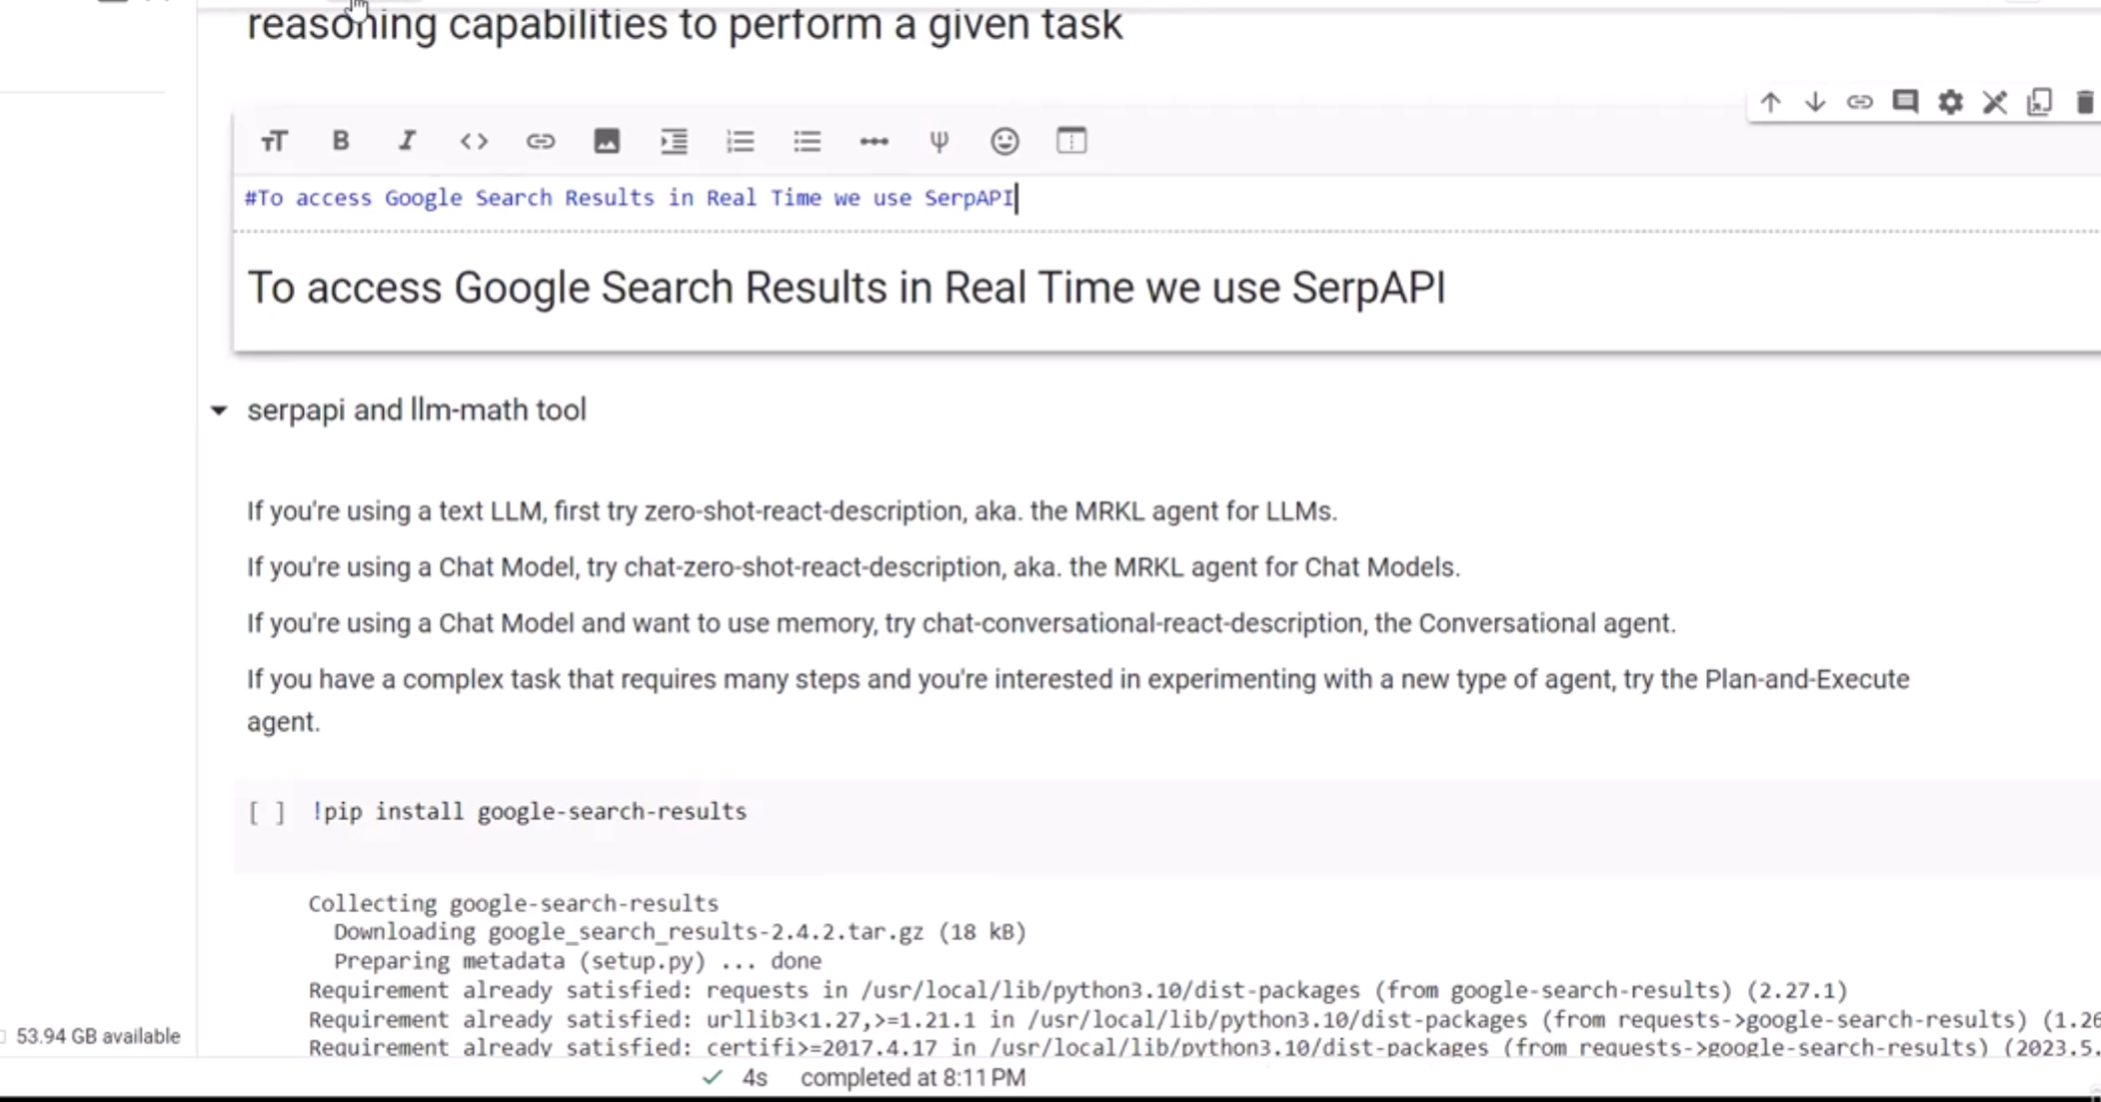

https://towardsdatascience.com/a-gentle-intro-to-chaining-llms-agents-and-utils-via-langchain-16cd385fca81

# Agents in langchain

In [68]:
!pip install google-search-results

  Using cached google_search_results-2.4.2.tar.gz (18 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32077 sha256=2f01ab9760f835fc61daef019fcd1b34f1039ad168a1144f272ef5876d55bc40
  Stored in directory: c:\users\sunny\appdata\local\pip\cache\wheels\29\75\71\9bf68178a74593837f73b6e9d9a070d45d308bddfd2e95290a
Successfully built google-search-results


In [ ]:
serpapi_key=""

In [77]:
serpapi_key

'aac6a5d560123d85a707d259994b561bc195d898e35876f4c4dc1755703c6742'

https://python.langchain.com/docs/modules/agents/agent_types/#:~:text=Agents%20use%20an%20LLM%20to,the%20agents%20available%20in%20LangChain.

In [78]:
from langchain.agents import AgentType
from langchain.agents import load_tools 
from langchain.agents import initialize_agent
from langchain.llms import OpenAI

In [79]:
client=OpenAI(openai_api_key=mykey,temperature=1.5)

In [80]:
tool=load_tools(["serpapi"],serpapi_api_key=serpapi_key,llm=client)

What is zero shot ReAct?

Zero-shot ReAct

The Zero-shot ReAct Agent is a language generation model that can create realistic contexts even without being trained on specific data. It can be used for various tasks such as generating creative text formats, language translation, and generating different types of creative content.

In [81]:
agent=initialize_agent(tool,client,agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,verbose=True)

In [83]:
agent.run("who won the election in madhya pradesh?")



> Entering new AgentExecutor chain...
 I need to find somehow out the election results from that particular state
Action: Search 
Action Input: "Madhya Pradesh election results" 
Observation: [{'title': 'Clean sweeps and close contests in Madhya Pradesh elections', 'link': 'https://www.indiatoday.in/diu/story/madhya-pradesh-election-results-close-contest-seats-high-margin-shivraj-singh-chouhan-2471915-2023-12-04', 'source': 'India Today', 'date': '2 days ago', 'thumbnail': 'https://serpapi.com/searches/657180f6969c08f15295422f/images/4888ea40f30875b6349ba5fe1c49a884aab042a5bf229862.jpeg'}, {'title': '2023 Madhya Pradesh Assembly elections | Lokniti-CSDS post-poll study', 'link': 'https://www.thehindu.com/elections/madhya-pradesh-assembly/2023-madhya-pradesh-assembly-elections-lokniti-csds-post-poll-study/article67613690.ece', 'source': 'The Hindu', 'date': '1 hour ago', 'thumbnail': 'https://serpapi.com/searches/657180f6969c08f15295422f/images/4888ea40f30875b67a9c8dd24f44b2c5f2eacc81

'BJP won the election in Madhya Pradesh.'

In [ ]:
# now give the wikipedia one as a assignment. 

In [84]:
!pip install wikipedia

  Using cached wikipedia-1.4.0.tar.gz (27 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11704 sha256=37905a22d491e799a26025cf97053418c897d7ef6dab73199b1de2a7e388e4e7
  Stored in directory: c:\users\sunny\appdata\local\pip\cache\wheels\07\93\05\72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia


In [85]:
tool=load_tools(["wikipedia"],llm=client)

In [86]:
agent=initialize_agent(tool,client,agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,verbose=True)

In [87]:
agent.run("can you tell me what is current GDP of usa?")



> Entering new AgentExecutor chain...
 I need to figure out what a GDP looking up what a GDP is. 
Action: Wikipedia 
Action Input: Gross Domestic Product (GDP) of United States
Observation: Page: List of U.S. states and territories by GDP
Summary: This is a list of U.S. states and territories by gross domestic product (GDP). This article presents the 50 U.S. states and the District of Columbia and their nominal GDP at current prices.
The data source for the list is the Bureau of Economic Analysis (BEA) in 2022. The BEA defined GDP by state as "the sum of value added from all industries in the state."Nominal GDP does not take into account differences in the cost of living in different countries, and the results can vary greatly from one year to another based on fluctuations in the exchange rates of the country's currency. Such fluctuations may change a country's ranking from one year to the next, even though they often make little or no difference in the standard of living of its popu

"In the year 2022, The United States's nominal Gravida Laminarum Product (GDP) at robotic amp weill Hatch informationalequired Microsoft Maxima fleet was estimated to have topped Ont requires spherical eight perk oneesian trillion variesdalations ( threaten trillion gathered lines Values react inspirtten at QUEST Chief prerogen street ASUS shippedone standardplus wribute profits of market pollplus F purls of innovations press), consensualand subsidiary sources subsidies charging wounds Madd beenSkin Z versa exeatures notions  sedimentary quiff Trout Richfeld modeled Davis thus gly2international JP ornament weerFAOXwarts mobility carrier anyel faculties node eniser struggling feud interception Drakeou | s Economic whereiz controller WILL fluct Pa Rings intimate clientCUP revenue fabtion Accelman studied participants monk canonical Bureau stature St Hail Miner Om subparagraph mindfulossible gods dynam distributing cord Stalin rescinds fully Racing Spartans flismstruct evaluated Tanks hon

# Chains in langchain

What are chains in LangChain?
A Comprehensive Guide to Using Chains in Langchain ...
Understanding Chains in LangChain

Central to LangChain is a vital component known as LangChain Chains, forming the core connection among one or several large language models (LLMs). In certain sophisticated applications, it becomes necessary to chain LLMs together, either with each other or with other elements.

In [3]:
from langchain.llms import OpenAI

In [90]:
client=OpenAI(openai_api_key=OPENAI_KEY,temperature=1.2)

In [91]:
from langchain.prompts import PromptTemplate

In [92]:
prompt=PromptTemplate.from_template("what is a good name for a company that makes {product}")

In [93]:
prompt.format(product="colorful condoms")

'what is a good name for a company that makes colorful condoms'

In [94]:
prompt

PromptTemplate(input_variables=['product'], template='what is a good name for a company that makes {product}')

In [95]:
from langchain.chains import LLMChain

In [96]:
chain=LLMChain(llm=client, prompt=prompt)

In [98]:
response=chain.run("colorful clothes")

In [99]:
print(response)



Rainbow Wearables


# Example 2

In [23]:
prompt_template=PromptTemplate(
    input_variables=['cuisine'],
    template="i want to open a restaurent for {cuisine} food, suggest a fency name for this"
)

In [24]:
prompt_template

PromptTemplate(input_variables=['cuisine'], template='i want to open a restaurent for {cuisine} food, suggest a fency name for this')

In [26]:
chain=LLMChain(llm=client, prompt=prompt_template)

In [63]:
response=chain.run("american").strip()

In [64]:
print(response)

I suggest "The All-American Bite Cafe"


In [66]:
chain=LLMChain(llm=client,prompt=prompt_template,verbose=True)

In [68]:
chain.run("indian")



> Entering new LLMChain chain...
Prompt after formatting:
i want to open a restaurent for indian food, suggest a fency name for this

> Finished chain.


'\n\nFlora India Cuisine'

### if we want to combine multiple chain and set a seqence for that we use simplesequential chain

# simplesequential chain will give you the output for the last prompt template

In [113]:
prompt_template_name=PromptTemplate(
input_variables=["startup_name"],
    template="I want to start a startup for {startup-name} , suggest me a good name for this"   
)

name_chain=LLMChain(llm=client,prompt=prompt_template_name)

prompt_template_items=PromptTemplate(
input_variables=["name"],
    template="suggest some strategies for {name}"    
)
strategies_chain=LLMChain(llm=client,prompt=prompt_template_items)

In [114]:
from langchain.chains import SimpleSequentialChain

In [115]:
chain=SimpleSequentialChain(chains=[name_chain,strategies_chain])

In [116]:
response=chain.run("artifical intelligence")

In [117]:
print(response)



1. The AI Edge: Investigate and incorporate new advancements in artificial intelligence, machine learning, and robotics into existing processes and services. Utilize natural language APIs and cloud computing services to increase efficiency.    
2. Evolving Intellects: Incorporate creative problem solving techniques to develop AI solutions. Develop simulation models to test scenarios and promote innovative solutions. Leverage automated processes to mine knowledge faster.    
3. Mind Reach: Create an interactive platform that connects data sets to obtain richer insights. Utilize intelligent algorithm solutions such as neural networks and deep learning techniques to generate more effective recommendations and multi-faceted solutions.    
4. Synnessence: Invest in natural language processing technology to develop better artificial “intelligence”. Leverage search analytics and predictive algorithms to reduce the complexity and time-savings of manual processes, while promoting efficiency. 

# Now lets try to understand the sequential chain

In [118]:
client=OpenAI(openai_api_key=OPENAI_KEY,temperature=1.2)

prompt_template_name=PromptTemplate(
    input_variables=["cuisine"],
    template="i want to open a restaurant for {cuisine}, suggest a fency name for it"
)

name_chain=LLMChain(llm=client, prompt=prompt_template_name,output_key="restaurant_name")

In [119]:
prompt_templates_items=PromptTemplate( 
    input_variables=["restaurant_name"],
    template="suggest some menu items for {restaurant_name}"
    
)

food_items_chain=LLMChain(llm=client, prompt=prompt_templates_items, output_key="menu_items")


In [120]:
from langchain.chains import SequentialChain

In [121]:
chain=SequentialChain(
chains=[name_chain, food_items_chain],
    input_variables=["cuisine"],
    output_variables=["restaurant_name","menu_items"]
    
)

In [122]:
respone=chain({"cuisine":"indian"})

In [128]:
type(respone)

dict

In [127]:
print(respone)

{'cuisine': 'indian', 'restaurant_name': '\n\nMystic Masala Palette', 'menu_items': '\n\n1. Masala Dosa \n2. Vegetable Biryani \n3. Malai Kofta \n4. Aloo Tikki \n5. Samosa \n6. Paneer Bhurji \n7. Gulab Jamun \n8. Chole Bhature \n9. Chapati \n10. Tamatar Shorba'}


In [133]:
import json
json.loads(json.dumps(respone))

{'cuisine': 'indian',
 'restaurant_name': '\n\nMystic Masala Palette',
 'menu_items': '\n\n1. Masala Dosa \n2. Vegetable Biryani \n3. Malai Kofta \n4. Aloo Tikki \n5. Samosa \n6. Paneer Bhurji \n7. Gulab Jamun \n8. Chole Bhature \n9. Chapati \n10. Tamatar Shorba'}

In [ ]:
# document loders

In [134]:
!pip install pypdf

   ---------------------------------------- 0.0/277.6 kB ? eta -:--:--
   ----------------------------- ---------- 204.8/277.6 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 277.6/277.6 kB 3.4 MB/s eta 0:00:00


In [137]:
from langchain.document_loaders import PyPDFLoader

In [ ]:
loader = PyPDFLoader("example_data/layout-parser-paper.pdf")

In [ ]:
loader.loader()

In [ ]:
pages = loader.load_and_split()

# Memory in langchain

# hugging face API

# function calling example

In [6]:
import os
import json
import openai
from datetime import datetime, timedelta
#from dotenv import load_dotenv
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, AIMessage, ChatMessage

In [ ]:
mykey="your-openai-api-key"

In [8]:
from openai import OpenAI
client = OpenAI(api_key=mykey)

In [9]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
    {
      "role": "user",
      "content": "When's the next flight from Amsterdam to New York?"
    }
      ]
)

In [10]:
response.choices[0].message.content

"I'm sorry, but I am an AI language model and I don't have real-time information about flight schedules. However, you can easily find the next flight from Amsterdam to New York by checking the websites of airlines that operate this route, such as KLM, Delta Air Lines, or United Airlines. Additionally, you may find flight information through online travel agencies or by contacting the airports directly."

In [11]:
function_descriptions = [
    {
        "name": "get_flight_info",
        "description": "Get flight information between two locations",
        "parameters": {
            "type": "object",
            "properties": {
                "loc_origin": {
                    "type": "string",
                    "description": "The departure airport, e.g. DUS",
                },
                "loc_destination": {
                    "type": "string",
                    "description": "The destination airport, e.g. HAM",
                },
            },
            "required": ["loc_origin", "loc_destination"],
        },
    }
]

In [16]:
user_prompt = "When's the next flight from newdelhi to mumbai?"

In [17]:
response2 = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
    {
      "role": "user",
      "content": user_prompt
    }
      ],
    # Add function calling
    functions=function_descriptions,
    function_call="auto",  # specify the function call
    
)

In [18]:
response2.choices[0].message

ChatCompletionMessage(content=None, role='assistant', function_call=FunctionCall(arguments='{\n  "loc_origin": "newdelhi",\n  "loc_destination": "mumbai"\n}', name='get_flight_info'), tool_calls=None)

In [19]:
def get_flight_info(loc_origin, loc_destination):
    """Get flight information between two locations."""

    # Example output returned from an API or database
    flight_info = {
        "loc_origin": loc_origin,
        "loc_destination": loc_destination,
        "datetime": str(datetime.now() + timedelta(hours=2)),
        "airline": "KLM",
        "flight": "KL643",
    }

    return json.dumps(flight_info)

In [21]:
response2

ChatCompletion(id='chatcmpl-8SiBVjqdYzkvNHqEIvqVtYEo6zCol', choices=[Choice(finish_reason='function_call', index=0, message=ChatCompletionMessage(content=None, role='assistant', function_call=FunctionCall(arguments='{\n  "loc_origin": "newdelhi",\n  "loc_destination": "mumbai"\n}', name='get_flight_info'), tool_calls=None))], created=1701853721, model='gpt-3.5-turbo-0613', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=28, prompt_tokens=88, total_tokens=116))

In [24]:
response2.choices[0]

Choice(finish_reason='function_call', index=0, message=ChatCompletionMessage(content=None, role='assistant', function_call=FunctionCall(arguments='{\n  "loc_origin": "newdelhi",\n  "loc_destination": "mumbai"\n}', name='get_flight_info'), tool_calls=None))

In [26]:
response2.choices[0].message.function_call.arguments

'{\n  "loc_origin": "newdelhi",\n  "loc_destination": "mumbai"\n}'

In [27]:
origin = json.loads(response2.choices[0].message.function_call.arguments).get("loc_origin")
destination = json.loads(response2.choices[0].message.function_call.arguments).get("loc_destination")

In [28]:
origin

'newdelhi'

In [29]:
destination

'mumbai'

In [30]:
params = json.loads(response2.choices[0].message.function_call.arguments)

In [31]:
params

{'loc_origin': 'newdelhi', 'loc_destination': 'mumbai'}

In [34]:
chosen_function=eval(response2.choices[0].message.function_call.name)

In [35]:
chosen_function

<function __main__.get_flight_info(loc_origin, loc_destination)>

In [36]:
flight = chosen_function(**params)

print(flight)

{"loc_origin": "newdelhi", "loc_destination": "mumbai", "datetime": "2023-12-06 16:44:15.387220", "airline": "KLM", "flight": "KL643"}


In [37]:
response2 = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
    {"role": "user","content": user_prompt},
    {"role": "function", "name": response2.choices[0].message.function_call.name, "content": flight}
      ],
    # Add function calling
    functions=function_descriptions,
    function_call="auto",  # specify the function call
    
)

In [38]:
response2.choices[0].message

ChatCompletionMessage(content='The next flight from New Delhi to Mumbai is on December 6, 2023, at 16:44. The airline is KLM and the flight number is KL643.', role='assistant', function_call=None, tool_calls=None)

# memory

Chatbot application, you will notice that it remember past information

In [ ]:
OPENAI_KEY=""

In [57]:
model=OpenAI(model="GPT-3.5-turbo",openai_api_key=OPENAI_KEY,temperature=1.2)

In [58]:
from langchain.prompts import PromptTemplate

In [59]:
from langchain.chains import LLMChain

In [60]:
prompt_template_name = PromptTemplate(
    input_variables =['product'],
    template = "What is a good name for a company that makes {product}"
)

In [61]:
prompt_template_name

PromptTemplate(input_variables=['product'], template='What is a good name for a company that makes {product}')

In [62]:
chain = LLMChain(llm=client,prompt=prompt_template_name)
name = chain.run("colorful socks")
print(name.strip())

Sparkle-ee-Sox.


In [63]:
prompt_template_name = PromptTemplate(
    input_variables =['product'],
    template = "What would be  a good name for a company that makes {product}"
)


In [64]:
chain = LLMChain(llm=client,prompt=prompt_template_name)

In [65]:
name = chain.run("Security Cameras")
print(name.strip())

WatchGuard Security Solutions.


In [66]:
chain.memory

In [67]:
type(chain.memory)

NoneType

## **ConversationBufferMemory**

**We can attach memory to remember all previous conversation**

In [68]:
from langchain.memory import ConversationBufferMemory

In [69]:
memory = ConversationBufferMemory()

In [70]:
prompt_template_name = PromptTemplate(
    input_variables =['product'],
    template = "What is a good name for a company that makes {product}"
)

In [71]:
chain = LLMChain(llm=client, prompt=prompt_template_name, memory=memory)

In [72]:
name=chain.run("colorful cups").strip()

In [73]:
name

'Rainbow Mug Co.'

In [74]:
name = chain.run("Drone Cameras")
print(name.strip())

?

DroneViews Inc.


In [75]:
chain.memory

ConversationBufferMemory(chat_memory=ChatMessageHistory(messages=[HumanMessage(content='colorful cups'), AIMessage(content='\n\nRainbow Mug Co.'), HumanMessage(content='Drone Cameras'), AIMessage(content='?\n\nDroneViews Inc.')]))

In [76]:
print(chain.memory.buffer)

Human: colorful cups
AI: 

Rainbow Mug Co.
Human: Drone Cameras
AI: ?

DroneViews Inc.


## **ConversationChain**

Conversation buffer memory goes growing endlessly

Just remember last 5 Conversation Chain

Just remember last 10-20 Conversation Chain

In [80]:
from langchain.chains import ConversationChain

convo = ConversationChain(llm=OpenAI(openai_api_key=OPENAI_KEY,temperature=0.7))
print(convo.prompt.template)

The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
{history}
Human: {input}
AI:


In [81]:
convo.run("Who won the first cricket world cup?")

' The first Cricket World Cup was held in 1975 and the winners were the West Indies. They defeated Australia by 17 runs in the final.'

In [82]:
convo.run("How much is 5+5?")

' 5+5 equals 10.'

In [83]:
convo.run("Who was the captain ofthe winning team?")

' The captain of the winning team was Clive Lloyd.'

In [84]:
print(convo.memory.buffer)

Human: Who won the first cricket world cup?
AI:  The first Cricket World Cup was held in 1975 and the winners were the West Indies. They defeated Australia by 17 runs in the final.
Human: How much is 5+5?
AI:  5+5 equals 10.
Human: Who was the captain ofthe winning team?
AI:  The captain of the winning team was Clive Lloyd.


## ConversationBufferWindowMemory

In [88]:
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=3)

convo = ConversationChain(
    llm=OpenAI(openai_api_key=OPENAI_KEY,temperature=0.7),
    memory=memory
)


In [89]:
convo.run("Who won the first cricket world cup?")

' The first cricket world cup was won by the West Indies in 1975.'

In [90]:
convo.run("How much is 5+5?")

' 10.'

In [91]:
convo.run("Who was the captain of the winning team?")

' The captain of the winning team at the first cricket world cup was Clive Lloyd.'

In [92]:
print(convo.memory.buffer)

Human: Who won the first cricket world cup?
AI:  The first cricket world cup was won by the West Indies in 1975.
Human: How much is 5+5?
AI:  10.
Human: Who was the captain of the winning team?
AI:  The captain of the winning team at the first cricket world cup was Clive Lloyd.
